In [7]:
%pip install somoclu

Note: you may need to restart the kernel to use updated packages.


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline 

ValueError: 'c' argument has 200 elements, which is inconsistent with 'x' and 'y' with size 150.

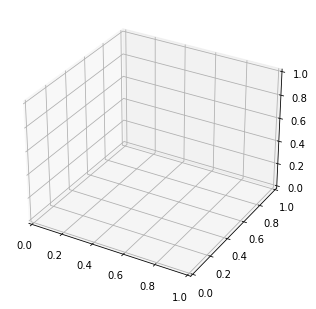

In [9]:
#c1 = np.random.rand(50, 3)/5
c1 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3), max_rows = 50) 
#c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c2 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header = 50, max_rows = 50)
#c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
c3 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=100, max_rows = 50)
#c4 = np.genfromtxt('submission/kohonen-maps/iris.csv', delimiter=',', usecols=(3))
data = np.float32(np.concatenate((c1, c2, c3)))
 
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
colors.extend(["yellow"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(150)

In [ ]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

CPU times: user 19.2 s, sys: 34.9 ms, total: 19.2 s
Wall time: 5.48 s


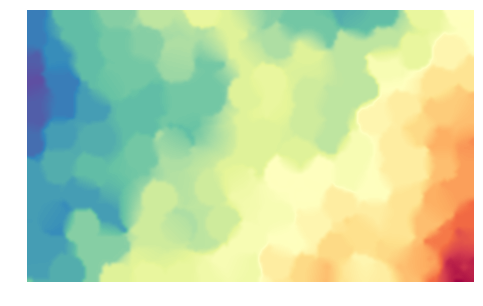

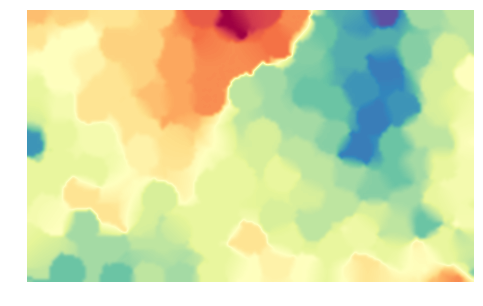

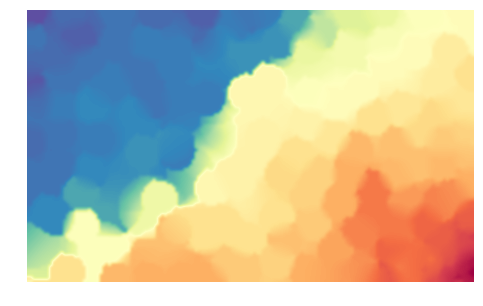

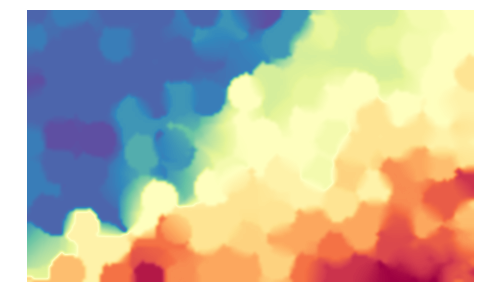

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_component_planes()

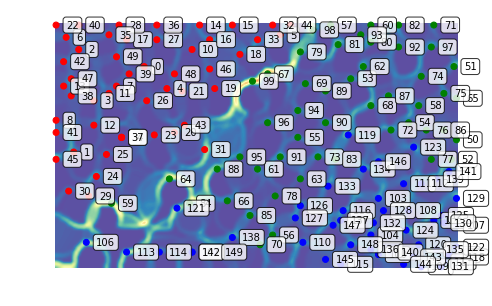

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

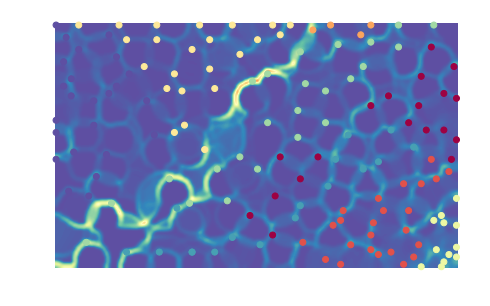

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.cluster()
som.view_umatrix(bestmatches=True)

/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:120: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.set_linewidth(0)
/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2265: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2265: MatplotlibDeprecationWarning: The is_sequence_of_strings function was deprecated in version 2.1.
  cstr = cbook.is_string_like(c) or cbook.is_sequence_of_strings(c)
/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:540: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(obj) and not isinstance(obj, np.ndarray):
/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:547: MatplotlibDeprecationWarning: The is

/usr/lib/python3/dist-packages/mpl_toolkits/mplot3d/axes3d.py:247: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  self.axesPatch.draw(renderer)


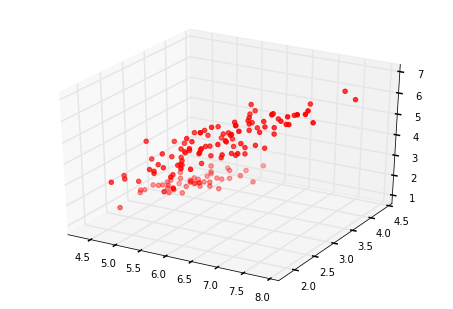

In [ ]:
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c=colors)

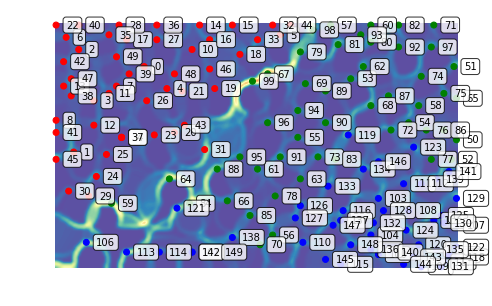

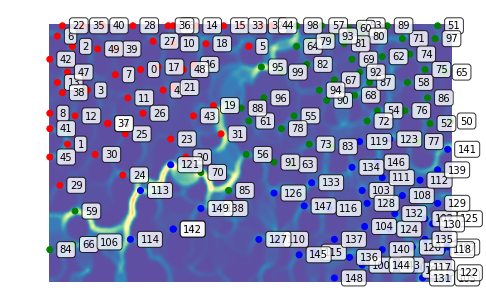

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=5, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)